# Открываем файл с результатами

импортируем необходимые модули (мы их устанавливали при помощи conda install)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

Открываем бинарные данные (в этом случае мы знаем размер данных)

In [26]:
ifile = '../MITgcm_c65p/verification/mytest/run/T.0000000020.data'

size  = 1*15*40*90
shape = (1,15,40,90)

data = np.fromfile(file=ifile, dtype = 'float32', count=size)

data = data.reshape(shape)

data = data.byteswap()



In [27]:
data.shape

(1, 15, 40, 90)

Размерность наших данных

In [28]:
data.shape

(1, 15, 40, 90)

Мы можем просто на них посмотреть

<matplotlib.colorbar.Colorbar instance at 0x7f756b6a0c20>

/home/ocean/miniconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


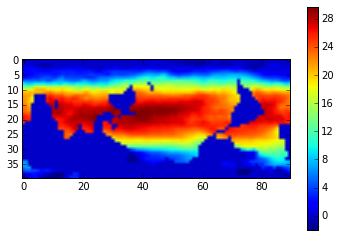

In [30]:
plt.imshow(data[0,0,:,:])
plt.colorbar()

Или нарисовать карту

In [31]:
lat = range(-80,80,4)
lon = range(0,360,4)
lon, lat = np.meshgrid(lon,lat)

In [32]:
lat.shape

(40, 90)

In [33]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [34]:
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='c')
x, y = m(lon, lat)

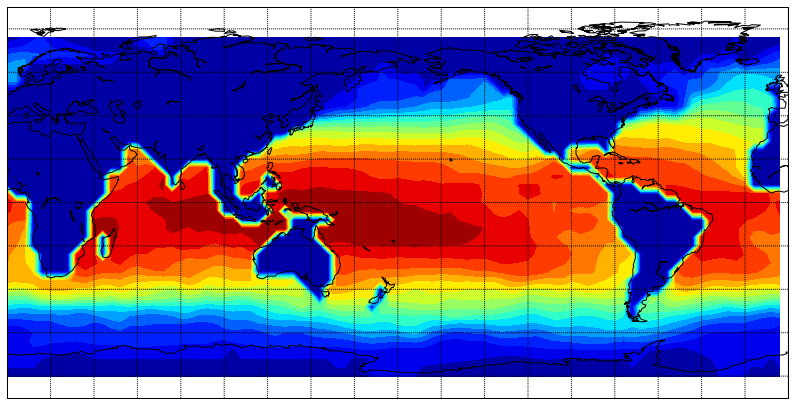

In [35]:
fig = plt.figure(figsize=(15,7))
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
cs = m.contourf(x,y,data[0,0,:,:],20)

Это отобразит данные "на сетке"

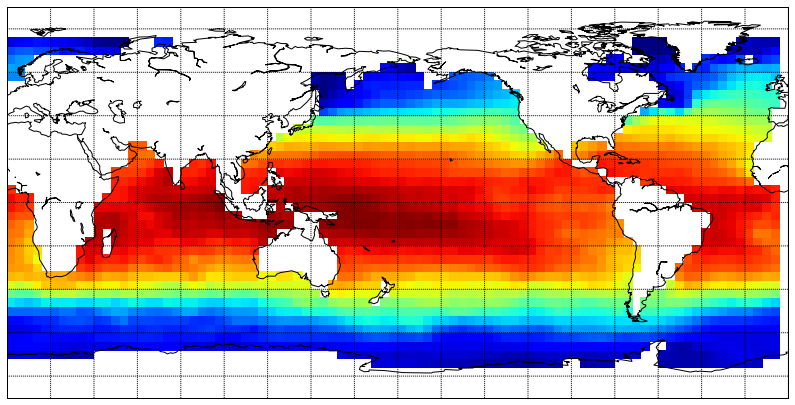

In [36]:
fig = plt.figure(figsize=(15,7))
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
cs = m.pcolormesh(x,y,np.ma.masked_equal(data[0,0,:,:],0.0))

Поздравляю, мы отобразили наши первые модельные данные